Name: Harshith Akkapelli

Dataset: [PetFinder Dataset](https://www.kaggle.com/competitions/petfinder-adoption-prediction/overview)

**Load the Dataset**

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import pathlib

dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder-mini/petfinder-mini.csv'

tf.keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
dataframe = pd.read_csv(csv_file)
dataframe.head()

1668792/1668792 [==============================] - 0s 0us/step


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


In [ ]:
dataframe.to_csv('data.csv')

**EDA**

EDA Insights

Summary Statistics

Age: Ranges from 0 to 255 (likely in months), but the maximum age seems unusually high, suggesting possible outliers or data entry errors.

Fee: Most adoption fees are zero, but they can go up to 2000, indicating a highly skewed distribution.

PhotoAmt: Varies from 0 to 30, with an average of around 3.6 photos per listing.
Missing Values

Description: 9 missing values. This is the only column with missing data.
Data Types and Unique Values

Mixed Types: Both categorical (object) and numerical (int64) data types are present.

High Cardinality: Columns like Breed1 and Description have a high number of unique values, which might complicate encoding for model training.

In [ ]:
# Performing the initial EDA steps

# Summary Statistics for numerical features
summary_statistics = dataframe.describe()

# Checking for missing values
missing_values = dataframe.isnull().sum()

# Data types and unique values in each column
data_types = dataframe.dtypes
unique_values = dataframe.nunique()

summary_statistics, missing_values, data_types, unique_values


(                Age           Fee      PhotoAmt  AdoptionSpeed
 count  11537.000000  11537.000000  11537.000000   11537.000000
 mean      11.743434     23.957268      3.610211       2.486522
 std       19.324221     80.024226      3.145872       1.173275
 min        0.000000      0.000000      0.000000       0.000000
 25%        2.000000      0.000000      2.000000       2.000000
 50%        4.000000      0.000000      3.000000       2.000000
 75%       12.000000      0.000000      5.000000       4.000000
 max      255.000000   2000.000000     30.000000       4.000000,
 Type             0
 Age              0
 Breed1           0
 Gender           0
 Color1           0
 Color2           0
 MaturitySize     0
 FurLength        0
 Vaccinated       0
 Sterilized       0
 Health           0
 Fee              0
 Description      9
 PhotoAmt         0
 AdoptionSpeed    0
 dtype: int64,
 Type             object
 Age               int64
 Breed1           object
 Gender           object
 Color1 

**Visualizations**

EDA Visualizations Insights
Age Distribution:

The majority of pets are younger, with a significant number of entries for very young pets.
There are a few entries with exceptionally high ages, which might be outliers or incorrect data entries.
Fee Distribution:

Most adoption fees are zero, with a few exceptions having higher fees.
This distribution is highly skewed towards lower fees.
PhotoAmt Distribution:

The number of photos per listing is generally between 0 and 10, with a peak around 1-5 photos.
Adoption Speed Distribution:

Adoption speeds are relatively evenly distributed, with a notable exception for the category labeled as "0".

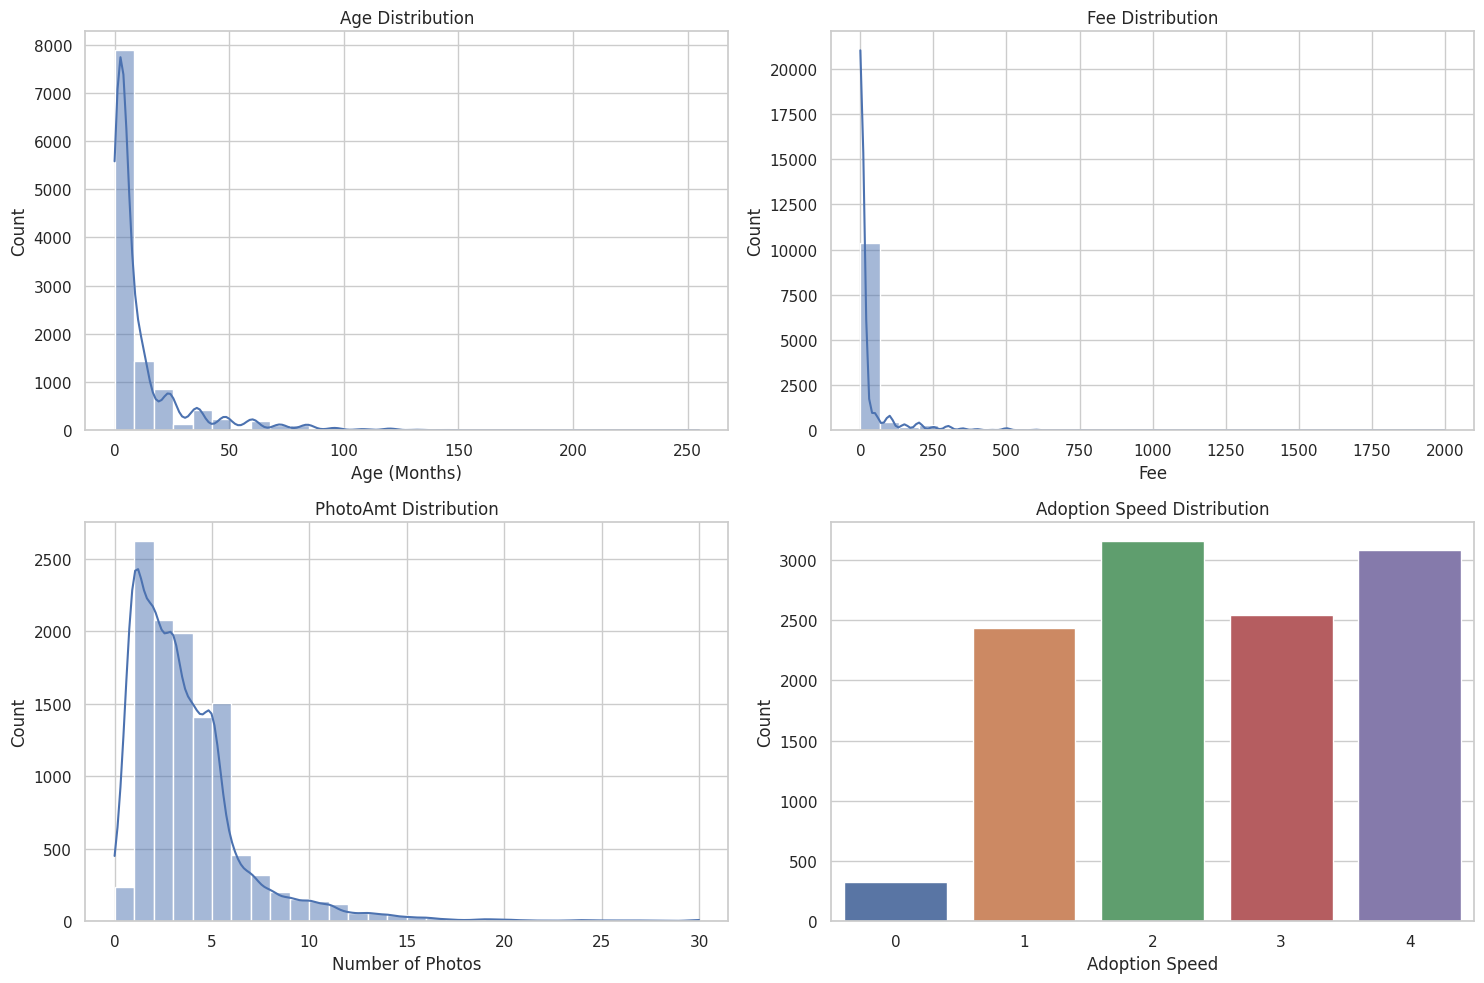

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Preparing for visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Age distribution
sns.histplot(dataframe['Age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (Months)')
axes[0, 0].set_ylabel('Count')

# Fee distribution
sns.histplot(dataframe['Fee'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Fee Distribution')
axes[0, 1].set_xlabel('Fee')
axes[0, 1].set_ylabel('Count')

# Photo Amount distribution
sns.histplot(dataframe['PhotoAmt'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('PhotoAmt Distribution')
axes[1, 0].set_xlabel('Number of Photos')
axes[1, 0].set_ylabel('Count')

# Adoption Speed distribution
sns.countplot(x='AdoptionSpeed', data=dataframe, ax=axes[1, 1])
axes[1, 1].set_title('Adoption Speed Distribution')
axes[1, 1].set_xlabel('Adoption Speed')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Auto EDA**

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 23.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



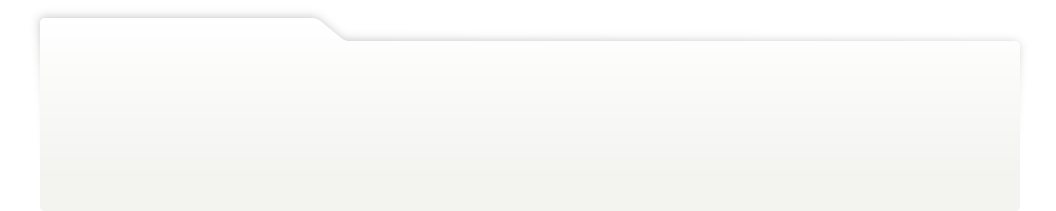
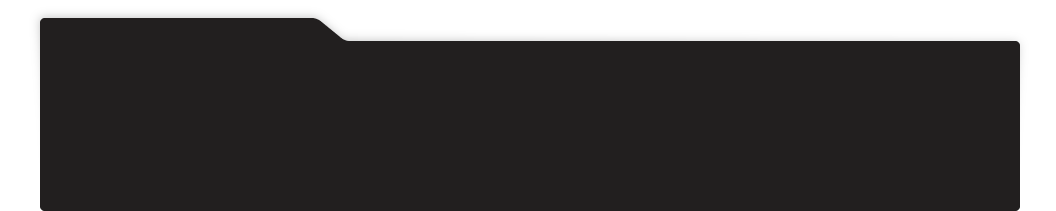
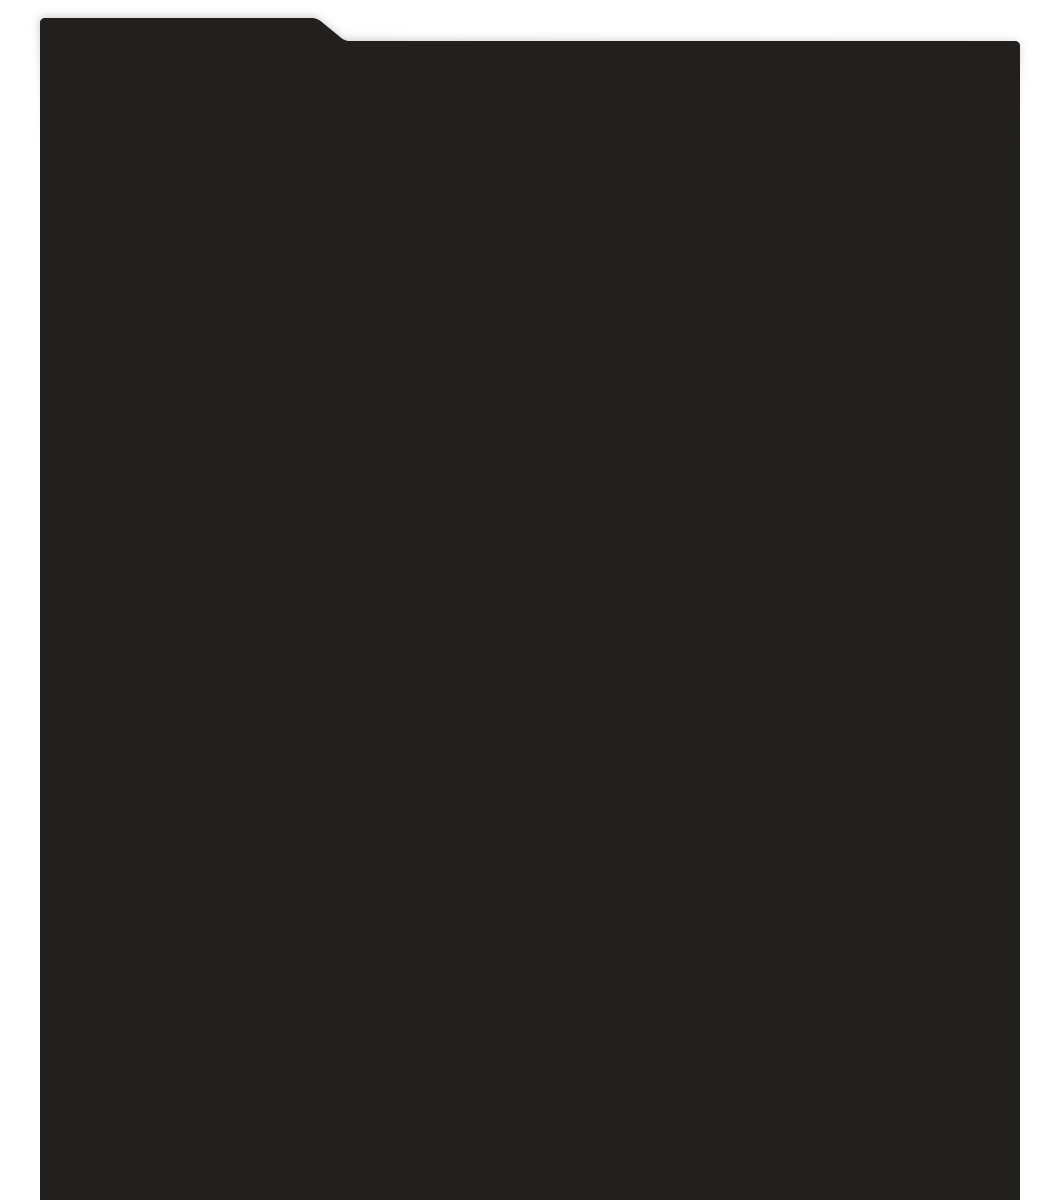
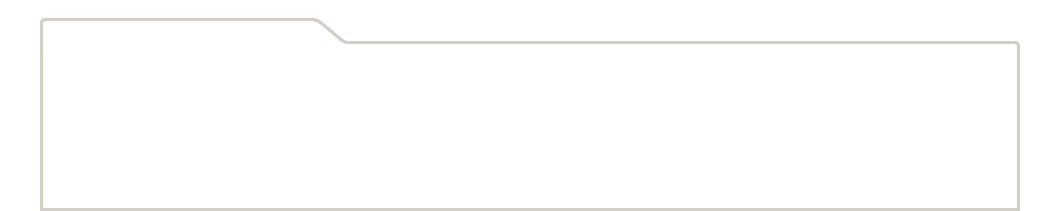
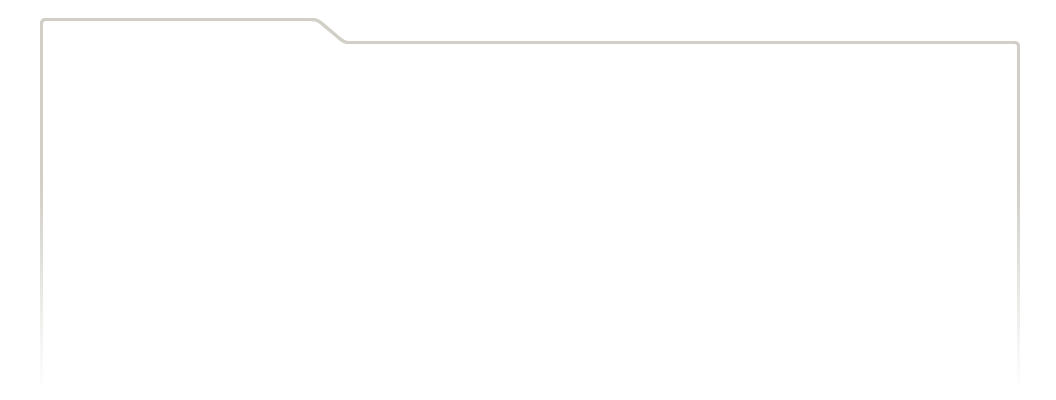
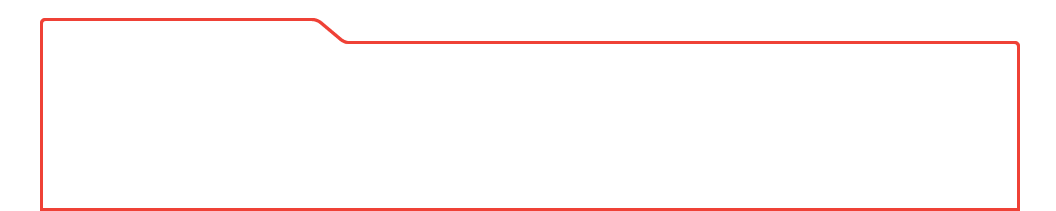
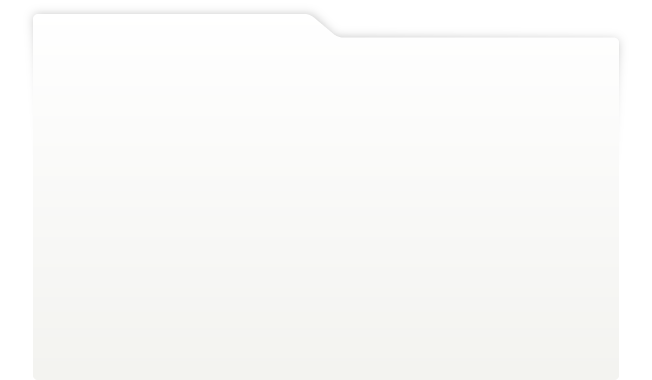
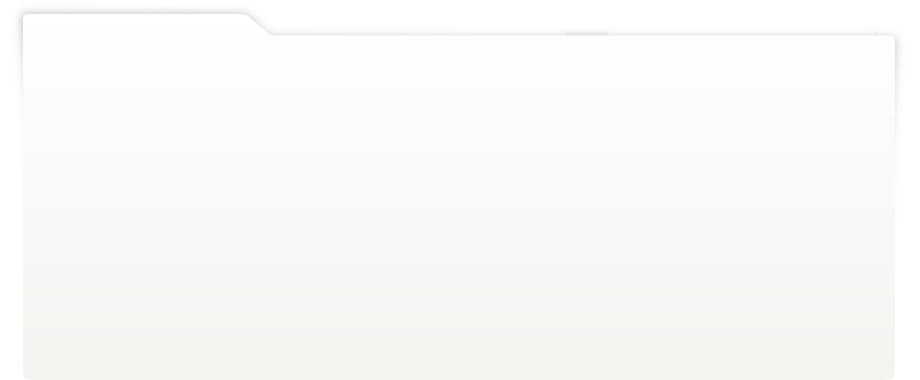
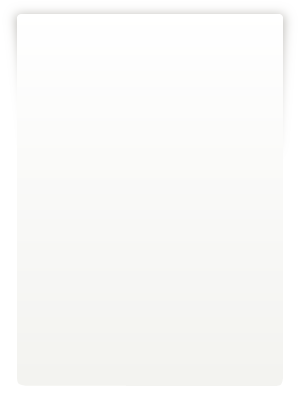
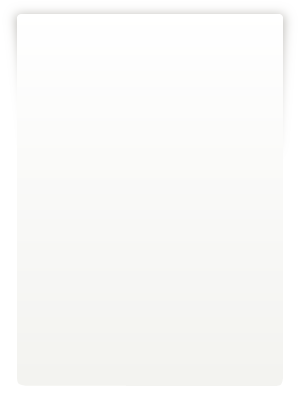
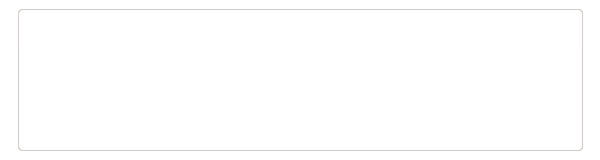
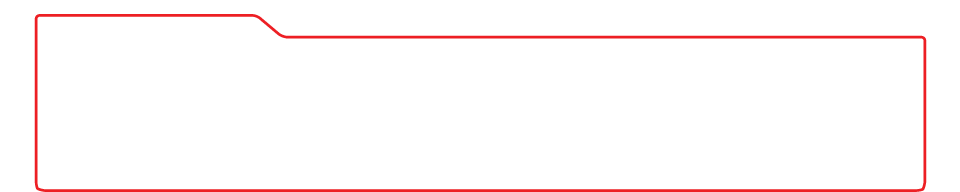
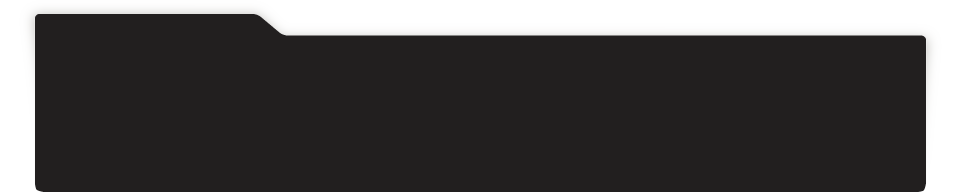
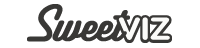
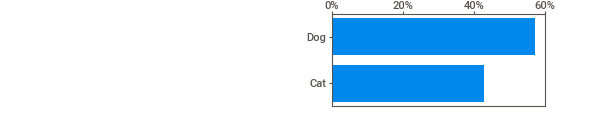
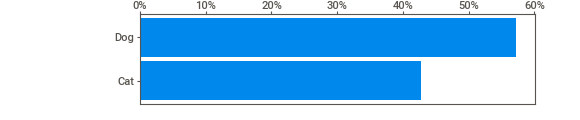
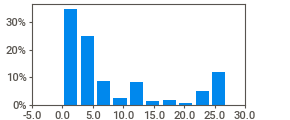
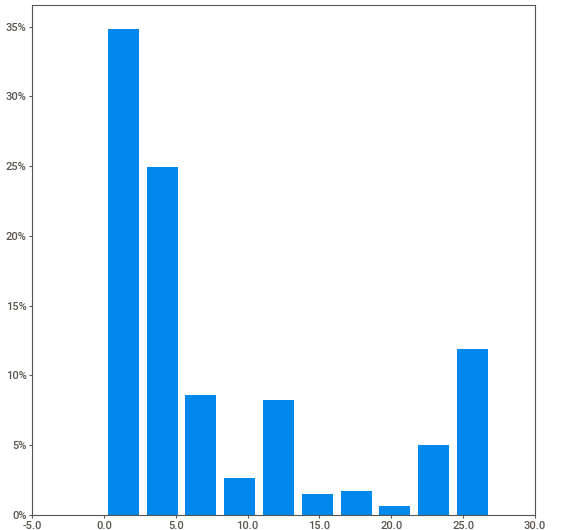
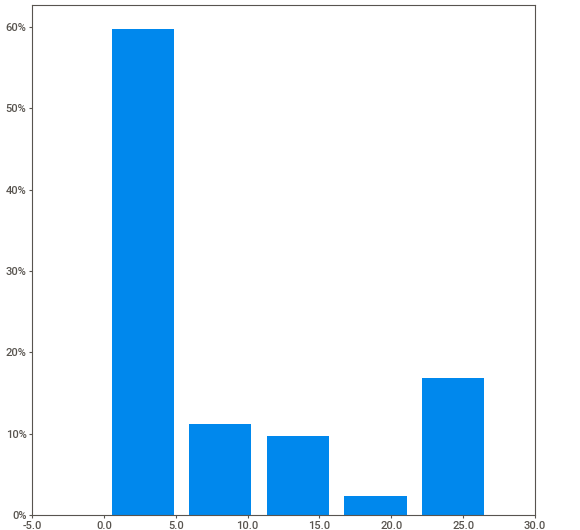
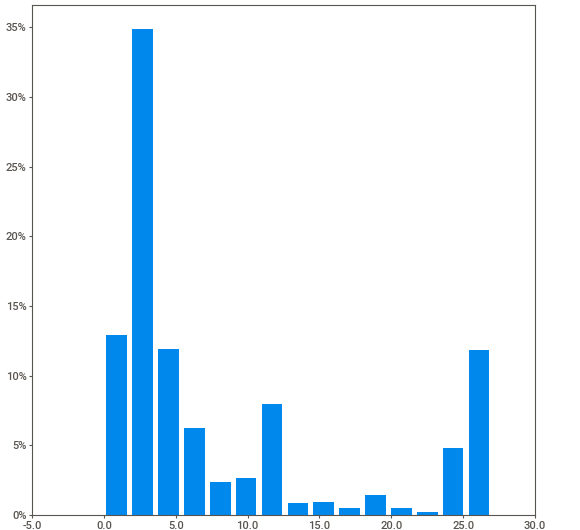
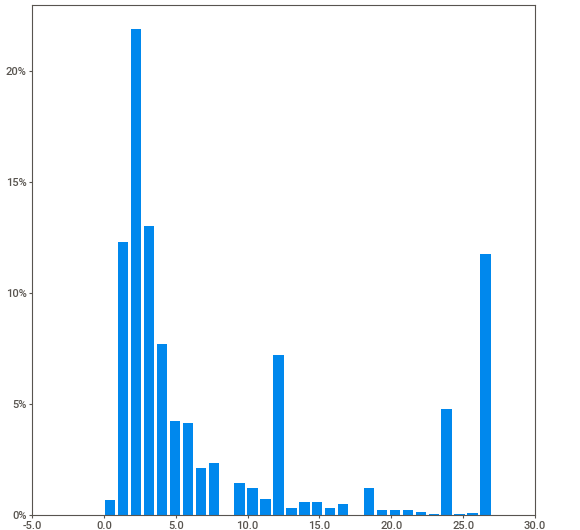
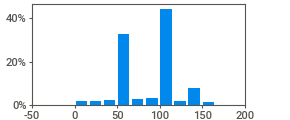
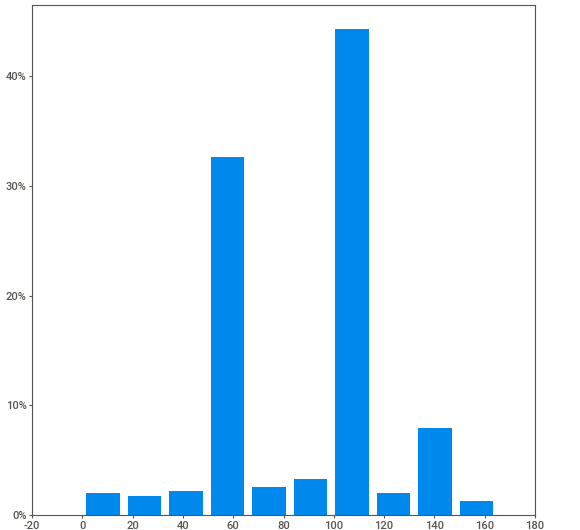
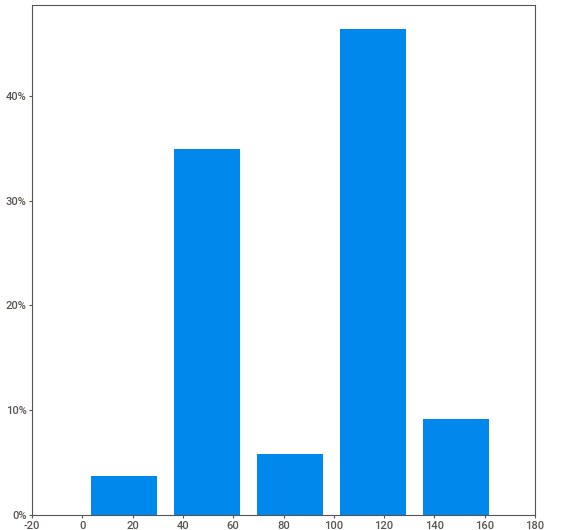
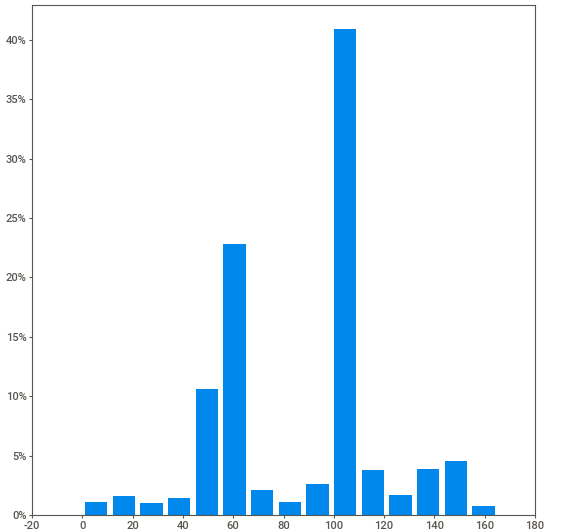
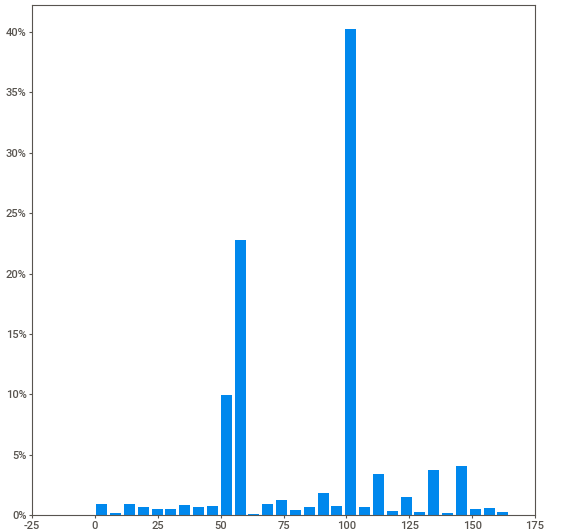
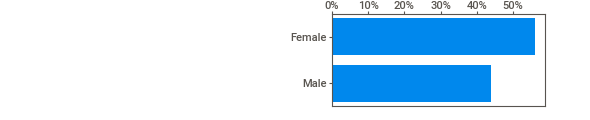
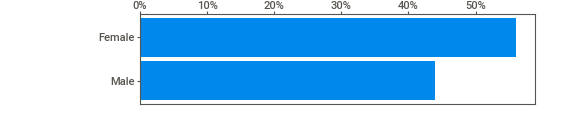
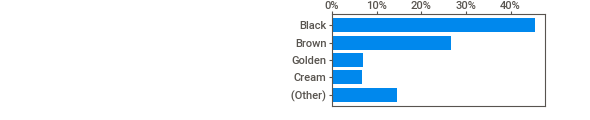
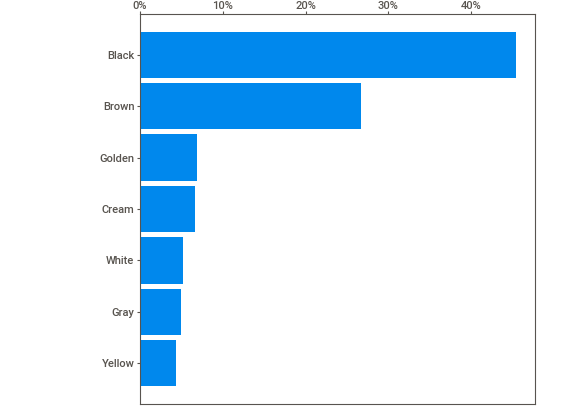
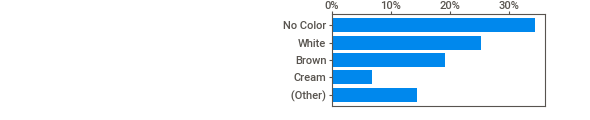
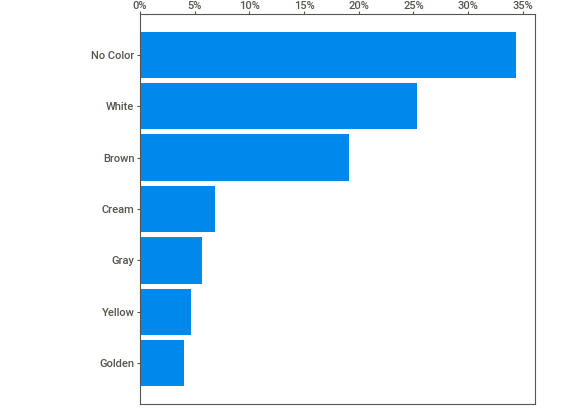
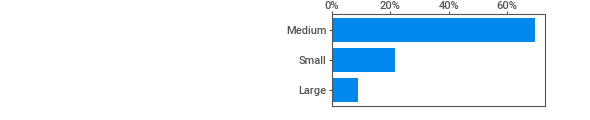
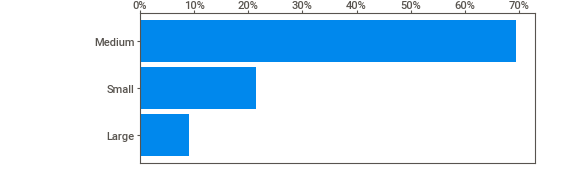
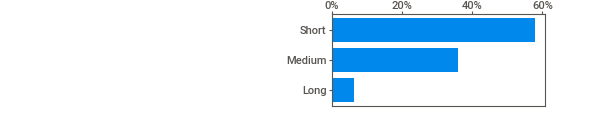
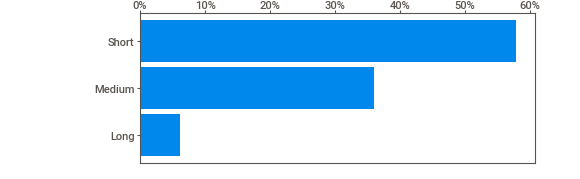
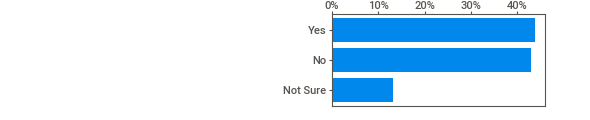
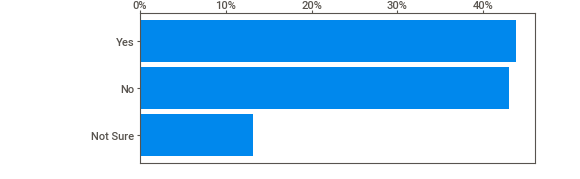
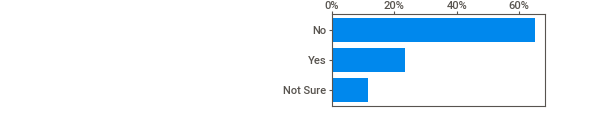
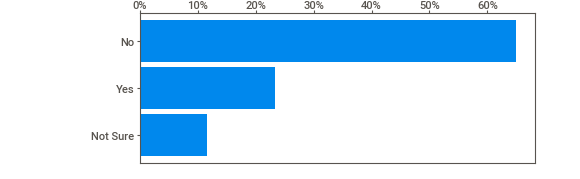
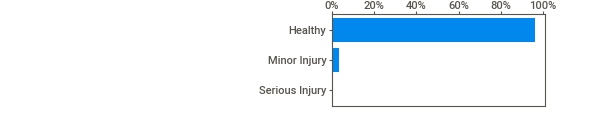
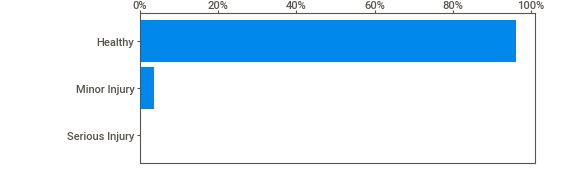
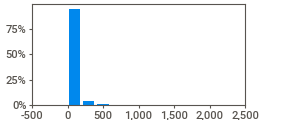
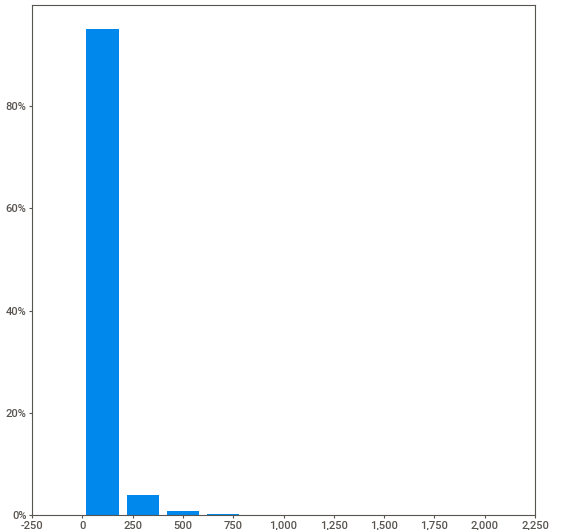
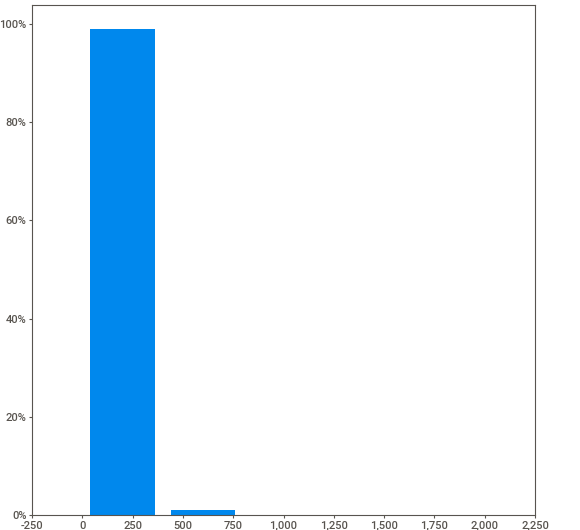
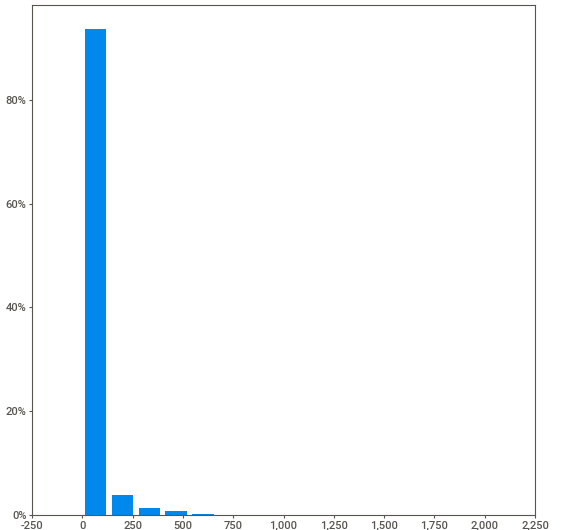
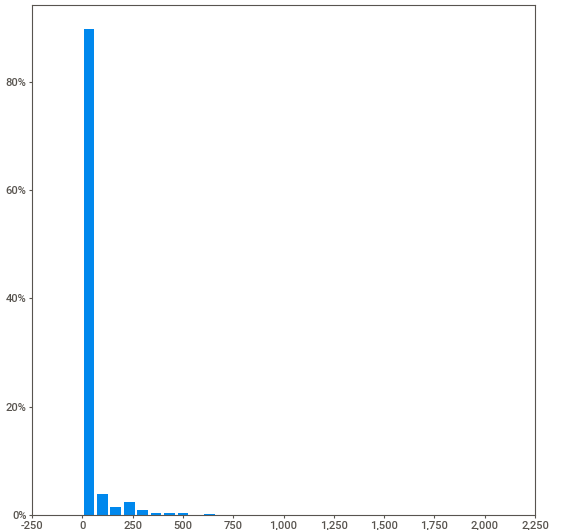
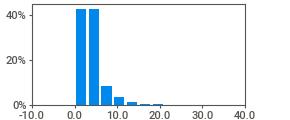
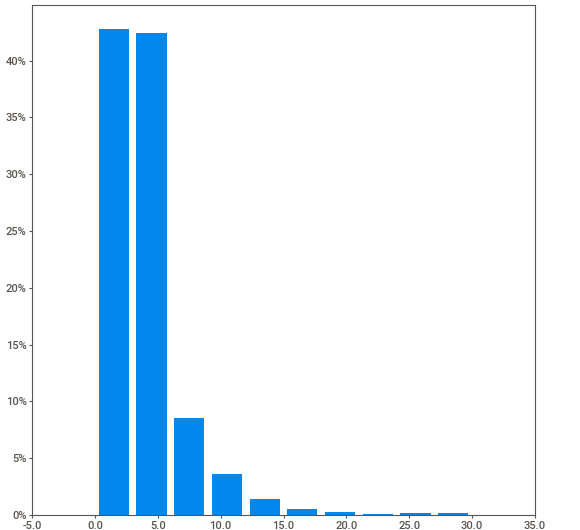
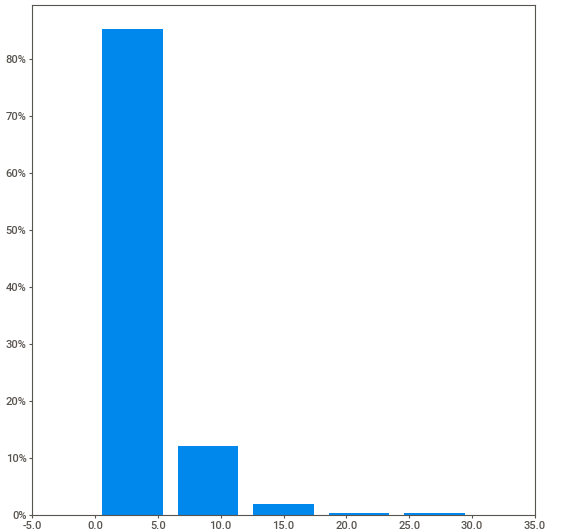
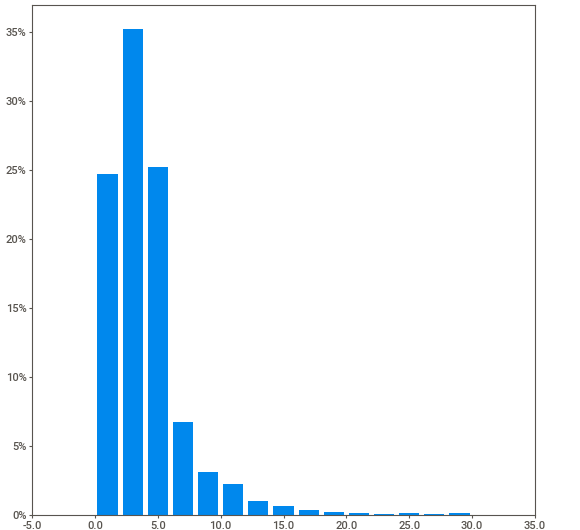
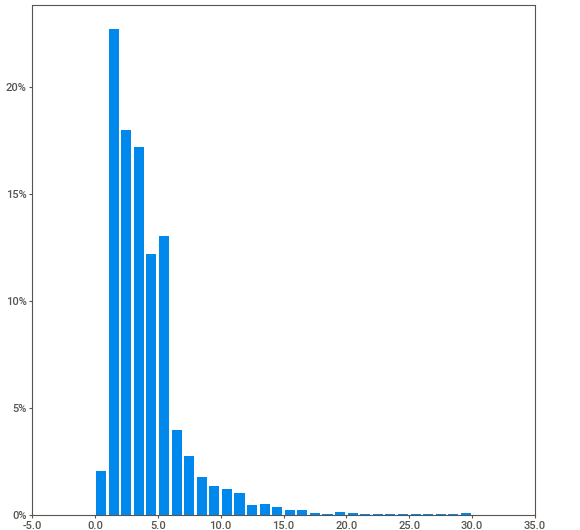
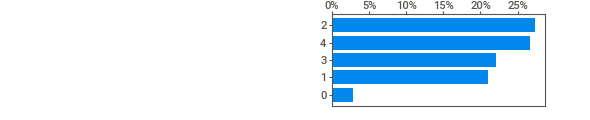
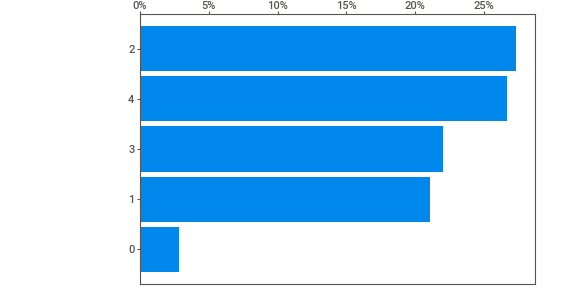
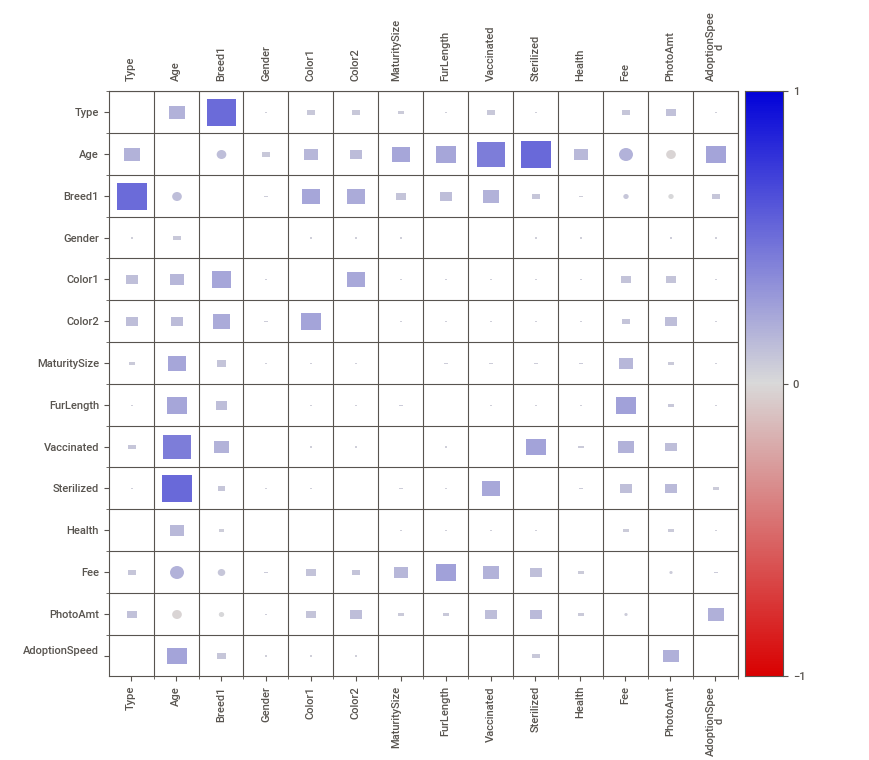
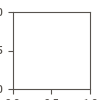

In [ ]:
import sweetviz as sv

# Analyze the dataset
report = sv.analyze(dataframe)

# Display the report
report.show_html('report.html')
from IPython.core.display import display, HTML

with open('report.html', 'r') as f:
    display(HTML(f.read()))

**Outlier analysis**

Age:
Outliers are defined as values outside the range -13 to 27 months.
There are 1,340 outliers in the Age column, indicating ages either unusually high or below 0 (which is not feasible).

Fee:
All non-zero fees are considered outliers based on the IQR method, with 1,965 outliers.
This suggests that the fee distribution is heavily skewed, and most adoption fees are zero.

Handling Outliers

Age: We might consider capping the ages at 27 months or removing entries with negative or extremely high ages.

Fee: Given the nature of the data, it might be more appropriate to leave these "outliers" as they are, as the fee is naturally skewed (most pets are adopted for free, but some have a high fee).

Handling the Description Column

Missing Values: Only 9 entries are missing. We could fill these with a placeholder text like "No description" or simply remove these rows.

Text Data: If we include Description in the model, we'll need to use text processing techniques like TF-IDF or embeddings. However, this would significantly increase the complexity of the model.

In [ ]:
# Outlier detection using the IQR method for 'Age' and 'Fee'

def detect_outliers_iqr(data, feature):
    """
    Detects outliers using the IQR method.

    :param data: DataFrame containing the feature.
    :param feature: The feature for which to detect outliers.
    :return: A tuple containing the indices of the outliers and the IQR thresholds.
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers.index, (lower_bound, upper_bound)

# Detecting outliers for 'Age' and 'Fee'
age_outliers, age_thresholds = detect_outliers_iqr(dataframe, 'Age')
fee_outliers, fee_thresholds = detect_outliers_iqr(dataframe, 'Fee')

# Outputting the results
age_outlier_count = len(age_outliers)
fee_outlier_count = len(fee_outliers)
age_thresholds, age_outlier_count, fee_thresholds, fee_outlier_count


((-13.0, 27.0), 1340, (0.0, 0.0), 1965)

In [ ]:
# Handling outliers in the 'Age' column by capping
dataframe['Age'] = dataframe['Age'].clip(upper=age_thresholds[1])

# Handling missing values in the 'Description' column
dataframe['Description'] = dataframe['Description'].fillna("No description")

# Confirming changes
age_after_outlier_handling = dataframe['Age'].describe()
description_missing_after_handling = dataframe['Description'].isnull().sum()

age_after_outlier_handling, description_missing_after_handling


(count    11537.000000
 mean         8.357025
 std          8.916483
 min          0.000000
 25%          2.000000
 50%          4.000000
 75%         12.000000
 max         27.000000
 Name: Age, dtype: float64,
 0)

**Encoding categorical variables and Feature selection**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Selecting categorical and numerical columns for processing
categorical_cols = dataframe.select_dtypes(include=['object']).columns
numerical_cols = dataframe.select_dtypes(exclude=['object']).columns

# Excluding 'Description' and 'Unnamed: 0' from the features
categorical_cols = [col for col in categorical_cols if col not in ['Description', 'Unnamed: 0']]

# One-hot encoding for nominal categorical variables with less than 10 unique categories
one_hot_cols = [col for col in categorical_cols if dataframe[col].nunique() < 10]
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(dataframe[one_hot_cols])

# Converting the encoded data back to a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# Label encoding for nominal categorical variables with more than 10 unique categories
label_cols = [col for col in categorical_cols if col not in one_hot_cols]
label_encoder = LabelEncoder()

for col in label_cols:
    dataframe[col] = label_encoder.fit_transform(dataframe[col])

# Combining the encoded dataframes
encoded_dataframe = pd.concat([dataframe[numerical_cols], dataframe[label_cols], one_hot_encoded_df], axis=1)

# Displaying the head of the newly encoded dataframe
encoded_dataframe.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Fee,PhotoAmt,AdoptionSpeed,Breed1,Type_Dog,Gender_Male,Color1_Brown,Color1_Cream,Color1_Golden,...,MaturitySize_Medium,MaturitySize_Small,FurLength_Medium,FurLength_Short,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Minor Injury,Health_Serious Injury
0,3,100,1,2,147,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,0,54,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0,7,3,99,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,150,8,2,99,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0,3,2,99,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Clustering and anamoly detection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

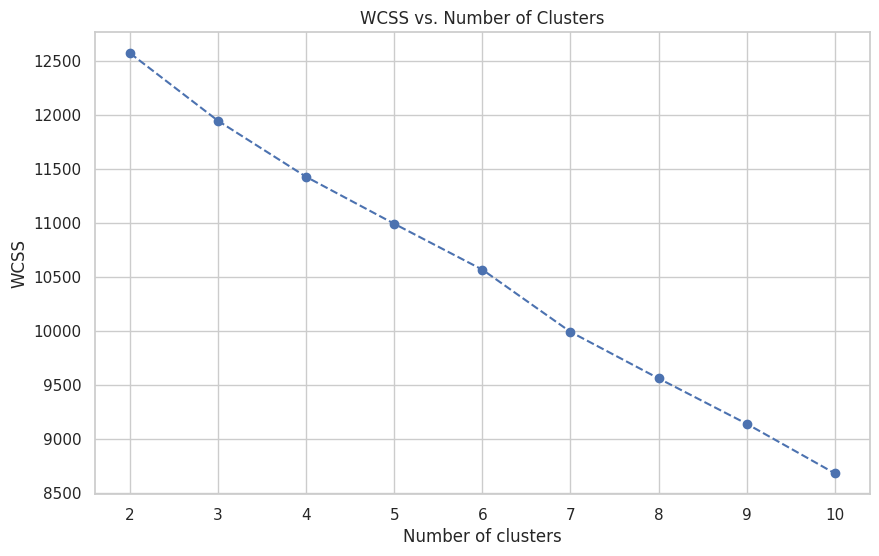

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Redefining the sample data for clustering
sample_data = encoded_dataframe.sample(n=500, random_state=42)

# Selecting features for clustering (excluding the target variable 'AdoptionSpeed')
features_for_clustering = sample_data.drop(['AdoptionSpeed'], axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Recalculating WCSS for different numbers of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fitting the model and predicting anomalies
anomalies = iso_forest.fit_predict(scaled_features)

# Identifying the anomalous data points
anomaly_indices = sample_data[anomalies == -1].index

# Number of anomalies detected
num_anomalies = len(anomaly_indices)
num_anomalies, anomaly_indices[:10]  # Displaying the first 10 anomalies detected


(5, Int64Index([8545, 2680, 10427, 6037, 4975], dtype='int64'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt



# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(scaled_features)

# Identifying the anomalous data points
anomaly_indices = [i for i, a in enumerate(anomalies) if a == -1]

# Number of anomalies detected
num_anomalies = len(anomaly_indices)
num_anomalies, anomaly_indices[:10]  # Displaying the first 10 anomalies detected


(116, [59, 230, 412, 569, 594, 642, 653, 674, 676, 848])

**Training ML models using AUTOML**

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 96.1 MB/s e

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have s

In [ ]:
from pycaret.classification import *
clf1 = setup(data = dataframe, target = 'AdoptionSpeed')


,Description,Value
0,Session id,647
1,Target,AdoptionSpeed
2,Target type,Multiclass
3,Original data shape,"(11537, 15)"
4,Transformed data shape,"(11537, 37)"
5,Transformed train set shape,"(8075, 37)"
6,Transformed test set shape,"(3462, 37)"
7,Ordinal features,2
8,Numeric features,4
9,Categorical features,10


In [ ]:
# Creating individual models
lr = create_model('lr')
rf = create_model('rf')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3168,0.6179,0.3168,0.3846,0.2634,0.0811,0.0976
1,0.2921,0.6162,0.2921,0.3476,0.2342,0.0506,0.0601
2,0.3280,0.6328,0.3280,0.3585,0.2899,0.0945,0.1058
3,0.3131,0.6252,0.3131,0.4214,0.2505,0.0778,0.0943
4,0.3230,0.5982,0.3230,0.3742,0.2859,0.0907,0.1037
5,0.3024,0.6179,0.3024,0.3961,0.2405,0.0649,0.0777
6,0.3209,0.6256,0.3209,0.3416,0.2648,0.0887,0.1019
7,0.2999,0.6064,0.2999,0.3959,0.2479,0.0603,0.0734
8,0.3197,0.6128,0.3197,0.3469,0.2676,0.0886,0.1013


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2921,0.5698,0.2921,0.4770,0.1924,0.0333,0.0642
1,0.2797,0.5897,0.2797,0.4861,0.2014,0.0209,0.0326
2,0.3181,0.5671,0.3181,0.6026,0.2156,0.0655,0.1449
3,0.3045,0.5851,0.3045,0.5118,0.2133,0.0516,0.0909
4,0.3032,0.5630,0.3032,0.4784,0.2168,0.0514,0.0849
5,0.2999,0.5772,0.2999,0.5347,0.2056,0.0437,0.0855
6,0.2912,0.5829,0.2912,0.4422,0.2078,0.0342,0.0545
7,0.3160,0.5980,0.3160,0.5056,0.2411,0.0675,0.1101
8,0.3135,0.5791,0.3135,0.5399,0.2152,0.0613,0.1200


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2723,0.5288,0.2723,0.3593,0.2174,0.0329,0.0379
1,0.2673,0.5677,0.2673,0.4315,0.2092,0.0321,0.0379
2,0.3391,0.5734,0.3391,0.5704,0.2736,0.1145,0.1376
3,0.2995,0.5795,0.2995,0.3554,0.2631,0.0666,0.0743
4,0.2809,0.5755,0.2809,0.3805,0.2281,0.0524,0.0618
5,0.2639,0.5663,0.2639,0.3923,0.2149,0.0251,0.0292
6,0.3123,0.5788,0.3123,0.3795,0.2649,0.0798,0.0919
7,0.3024,0.5831,0.3024,0.3364,0.2688,0.0804,0.0894
8,0.2912,0.5853,0.2912,0.4512,0.2395,0.0597,0.0681


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Ensemble model**

In [ ]:
# Stacking Models
stacked_model = stack_models([lr, rf, gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2809,0.5612,0.2809,0.4163,0.2250,0.0390,0.0459
1,0.2822,0.5852,0.2822,0.4547,0.2222,0.0496,0.0581
2,0.3329,0.5977,0.3329,0.5477,0.2715,0.1044,0.1268
3,0.3205,0.5879,0.3205,0.4313,0.2651,0.0885,0.1060
4,0.2871,0.5815,0.2871,0.4375,0.2323,0.0581,0.0682
5,0.2776,0.5652,0.2776,0.4390,0.2200,0.0365,0.0430
6,0.3110,0.5790,0.3110,0.4143,0.2504,0.0746,0.0900
7,0.3036,0.5879,0.3036,0.3732,0.2611,0.0740,0.0826
8,0.3061,0.5825,0.3061,0.4465,0.2464,0.0718,0.0846


Processing:   0%|          | 0/6 [00:00<?, ?it/s]